Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

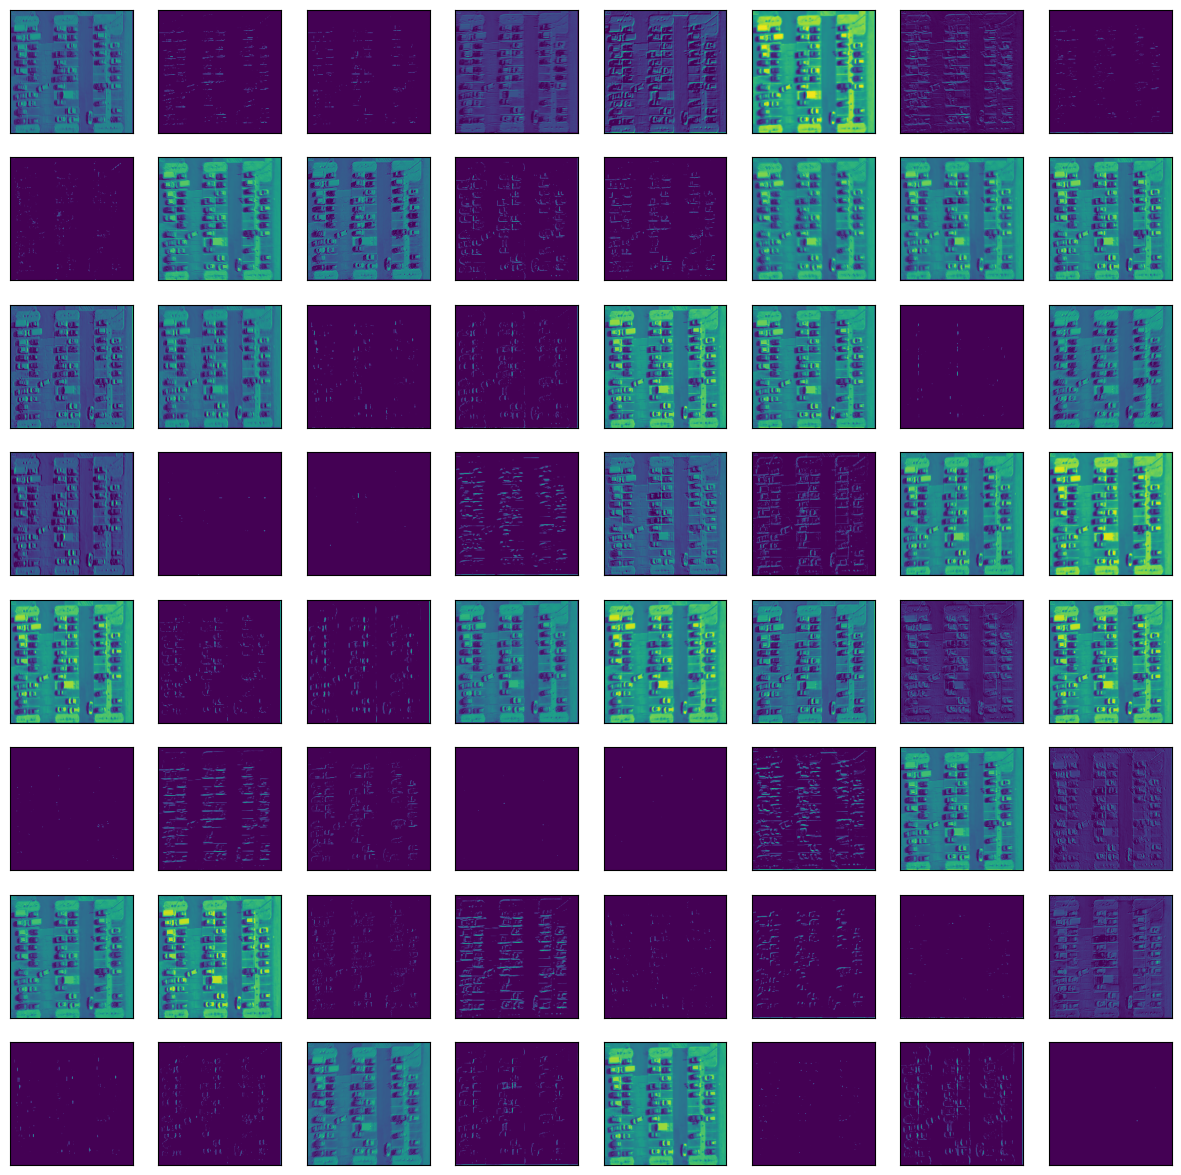

In [10]:
# Import necessary libraries
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load and preprocess the image using OpenCV
img = cv2.imread('/here put your image one image')
img = cv2.resize(img, (224, 224))
img = img.astype('float32') / 255.0  # Normalize the image

# Initialize the VGG16 model
VGG16 = Sequential()

# Block 1
VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu', padding='same', name='block1_conv1'))
VGG16.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2'))
VGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
VGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1'))
VGG16.add(Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2'))
VGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1'))
VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2'))
VGG16.add(Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3'))
VGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1'))
VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2'))
VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3'))
VGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1'))
VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2'))
VGG16.add(Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3'))
VGG16.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten
VGG16.add(Flatten())
VGG16.add(Dense(4096, activation='relu', name='fc1'))
VGG16.add(Dense(4096, activation='relu', name='fc2'))
VGG16.add(Dense(2, activation='softmax', name='predictions'))

# Compile the model
VGG16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Build the model with the new input shape
VGG16.build(input_shape=(1, 224, 224, 3))

# Print the model summary
VGG16.summary()

# Create a model that outputs the feature maps from the first convolutional layer
layer_name = 'block1_conv1'
intermediate_layer_model = Model(inputs=VGG16.input, outputs=VGG16.get_layer(layer_name).output)

# Predict the feature maps
feature_maps = intermediate_layer_model.predict(np.array([img]))

# Visualize the feature maps
plt.figure(figsize=(15, 15))
num_filters = feature_maps.shape[-1]

for i in range(num_filters):
    ax = plt.subplot(8, 8, i + 1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')

plt.show()
